# **CAR PRICE** **PRIDICTION**(**PROJECT 1**)

## IMPORTING OF MODULES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## IMPORTING THE DATASET

In [ ]:
dataset=pd.read_csv('project 2 dataset.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### MANAGING THE CATAGORICAL DATA

In [ ]:

categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:

    print(f"Category in {col} is : {dataset[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


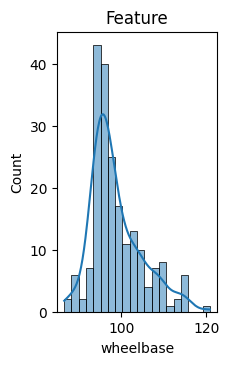

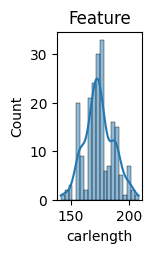

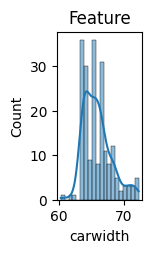

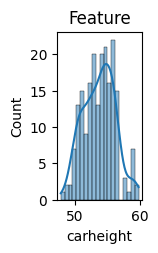

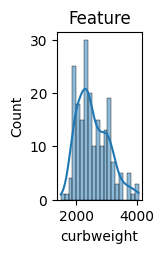

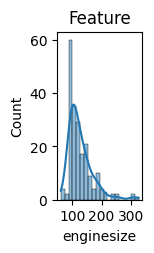

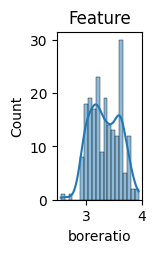

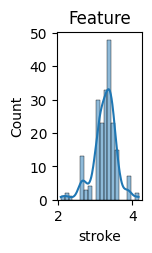

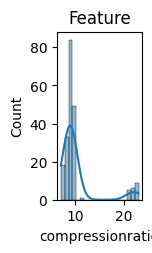

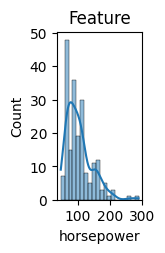

ValueError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:

numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']
plt.figure(figsize=(12,8))
for f in numerical_features:
    plt.subplot(2, 5, numerical_features.index(f) + 1)
    sns.histplot(data=dataset[f], bins=20, kde=True)
    plt.title('Feature')
    plt.show()

In [ ]:
plt.figure(figsize=((8,9)))
sns.histplot(data=dataset['price'], bins=21, kde=True)
plt.title('Distribution of Price')
plt.show()

In [ ]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 9))
axes=axes.ravel() #flattenning of 2d array
for i,column in enumerate(categorical_columns):
  sns.countplot(x=dataset[column],data=dataset,ax=axes[i],saturation=.80,palette='bright')
  for container in axes[i].containers:
     axes[i].bar_label(container, color='black', size=10)
     axes[i].set_title(f'Count Plot of {column.capitalize()}')
     axes[i].set_xlabel(column.capitalize())
     axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()





In [ ]:
n=20
top_car_models=dataset['CarName'].value_counts().head()
plt.figure(figsize=(20, 8))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [ ]:
correlation=dataset[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')


### Data Preproceesing

In [ ]:
dataset['brand'] = dataset['CarName'].apply(lambda x: x.split(' ')[0])
dataset['model'] = dataset['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

lableencoder=LabelEncoder()
for j in categorical_columns:
  dataset[j] = lableencoder.fit_transform(dataset[j])
dataset.head()
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

X = dataset.drop(['price', 'CarName'], axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plot1=regressor.predict(X_train)




In [56]:

mse=mean_squared_error(y_test,y_pred)
r2_error=r2_score(y_test,y_pred)
print(f" R-squared: {r2_error}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.841045772819147
Mean Squared Error: 12548485.829475101


In [55]:
pred_dataset=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_dataset

,Actual Value,Predicted Value,Difference
15,30760.000,25933.312971,4826.687029
9,17859.167,17412.330968,446.836032
100,9549.000,10046.150236,-497.150236
132,11850.000,13417.575223,-1567.575223
68,28248.000,26015.896996,2232.103004
95,7799.000,6671.086230,1127.913770
159,7788.000,7828.672971,-40.672971
162,9258.000,6239.889187,3018.110813
147,10198.000,11214.247597,-1016.247597
182,7775.000,7915.264592,-140.264592
